In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 1/Import librairies

# Algorisms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Processing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder ## Encoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MaxAbsScaler

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load dataset
df = pd.read_csv('Fraud_Detection.csv', nrows=50000)

# RandomForestClassifier

In [4]:
# Load dataset
df = pd.read_csv('Fraud_Detection.csv', nrows=50000)

categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical)
print("Numerical columns:", numerical)

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5

# Target variable
y = df['is_fraud'].astype(int)

# Columns to drop (only drop if they exist)
columns_to_drop = [
    'is_fraud', 'timestamp', 'Date', 'Time', 'transaction_id', 
    'sender_account', 'receiver_account', 'ip_address', 'device_hash'
]

# Drop only existing columns
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Numerical columns
numerical_features = ['amount', 'time_since_last_transaction', 'spending_deviation_score',
                      'velocity_score', 'geo_anomaly_score', 'hour', 'year', 'month', 'weekday']

# Categorical columns
categorical_features = ['transaction_type', 'merchant_category', 'location', 
                        'device_used', 'fraud_type', 'payment_channel']

# Pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_test

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Categorical columns: ['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'transaction_type', 'merchant_category', 'location', 'device_used', 'fraud_type', 'payment_channel', 'ip_address', 'device_hash']
Numerical columns: ['amount', 'time_since_last_transaction', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score']
Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regreessor 

In [29]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Revising code of 

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the pipeline using class_weight to handle imbalance
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

# Train the model (must come BEFORE predictions!)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))



Accuracy: 0.6882

Confusion Matrix:
 [[6878 3112]
 [   6    4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82      9990
           1       0.00      0.40      0.00        10

    accuracy                           0.69     10000
   macro avg       0.50      0.54      0.41     10000
weighted avg       1.00      0.69      0.81     10000


ROC AUC Score: 0.5527827827827828


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.0012836970474967907
Recall: 0.4
F1 Score: 0.0025591810620601407


## Use Oversampling to Fix Data Imbalance

In [39]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

ros_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

ros_pipeline.fit(X_train, y_train)
y_pred_ros = ros_pipeline.predict(X_test)
y_prob_ros = ros_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print("ROC AUC:", roc_auc_score(y_test, y_prob_ros))
print("Classification Report:\n", classification_report(y_test, y_pred_ros))


Accuracy: 0.6886
ROC AUC: 0.5536136136136136
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82      9990
           1       0.00      0.40      0.00        10

    accuracy                           0.69     10000
   macro avg       0.50      0.54      0.41     10000
weighted avg       1.00      0.69      0.81     10000



### Final Code with Class Weight & ROC

In [40]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6882
ROC AUC Score: 0.5527827827827828
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82      9990
           1       0.00      0.40      0.00        10

    accuracy                           0.69     10000
   macro avg       0.50      0.54      0.41     10000
weighted avg       1.00      0.69      0.81     10000



# k-NN (k-Nearest Neighbors)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # you can adjust k by changing n_neighbors
])

from sklearn.neighbors import KNeighborsClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X, y, numerical_features, categorical_features, and preprocessor are defined as in your original code

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Xgbost regressor 


In [43]:
from xgboost import XGBRegressor
import numpy as np

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

model.fit(X_train, y_train)

y_pred_continuous = model.predict(X_test)

# Threshold predictions to get classes (0 or 1)
y_pred = (y_pred_continuous >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9984

Confusion Matrix:
 [[9983    7]
 [   9    1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.12      0.10      0.11        10

    accuracy                           1.00     10000
   macro avg       0.56      0.55      0.56     10000
weighted avg       1.00      1.00      1.00     10000



## using GridSearchCV from scikit-learn to tune some key parameters:

## hyperparameter tuning for XGBoost

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

# Setup the pipeline with preprocessor and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Run grid search on training data
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits


ValueError: Invalid parameter 'colsample_bytree' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amount',
                                                   'time_since_last_transaction',
                                                   'spending_deviation_score',
                                                   'velocity_score',
                                                   'geo_anomaly_score', 'hour',
                                                   'year', 'month',
                                                   'weekday']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_freq...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].

## Naive Bayes


In [45]:
from sklearn.naive_bayes import GaussianNB

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4997

Confusion Matrix:
 [[4987 5003]
 [   0   10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67      9990
           1       0.00      1.00      0.00        10

    accuracy                           0.50     10000
   macro avg       0.50      0.75      0.33     10000
weighted avg       1.00      0.50      0.67     10000



## Decision tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9977

Confusion Matrix:
 [[9977   13]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



### Neural Network classifier

In [48]:
from sklearn.neural_network import MLPClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9986

Confusion Matrix:
 [[9986    4]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



### Lassor regression 


In [49]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## use Logistic Regression with L2 penalty (Ridge for classification):

In [50]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', solver='liblinear', random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LGBMClassifier

In [52]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.0/1.5 MB 495.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.5 MB 939.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.5 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 1.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 1.9 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.5 MB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 3.0 MB/s eta 0:00:01
   ---------------------------------

In [53]:
from lightgbm import LGBMClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 42, number of negative: 39958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001050 -> initscore=-6.857915
[LightGBM] [Info] Start training from score -6.857915
Accuracy: 0.9925

Confusion Matrix:
 [[9924   66]
 [   9    1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9990
           1       0.01      0.10      0.03        10

    accuracy                           0.99     10000
   macro avg       0.51      0.55      0.51     10000
weighted avg       1.00      0.99      1.00     10000



# SVM

In [28]:
from sklearn.svm import SVC

In [25]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

In [26]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.999

Confusion Matrix:
 [[9990    0]
 [  10    0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.865965965965966


# Balancing data

In [5]:
# Load dataset
df = pd.read_csv('Fraud_Detection.csv', nrows=50000)

#### SMOTE Oversampling in Pipeline

In [6]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# Define preprocessing (same as before)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# SMOTE + RandomForest pipeline
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the model
smote_pipeline.fit(X_train, y_train)

# Predict
y_pred = smote_pipeline.predict(X_test)
y_prob = smote_pipeline.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.999
Confusion Matrix:
 [[9990    0]
 [  10    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 0.9852302302302303


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomOverSampler in Pipeline

In [7]:
from imblearn.over_sampling import RandomOverSampler

ros_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('ros', RandomOverSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

ros_pipeline.fit(X_train, y_train)
y_pred_ros = ros_pipeline.predict(X_test)
y_prob_ros = ros_pipeline.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ros))
print("Classification Report:\n", classification_report(y_test, y_pred_ros))
print("ROC AUC:", roc_auc_score(y_test, y_prob_ros))


Accuracy: 0.999
Confusion Matrix:
 [[9990    0]
 [  10    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 0.8870170170170171


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Precision-Recall Curve + ROC Curve

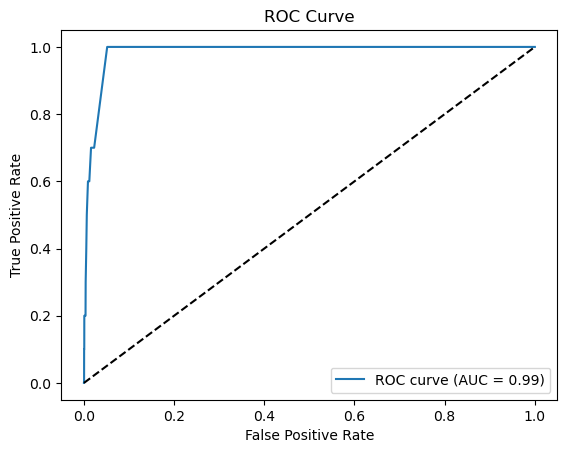

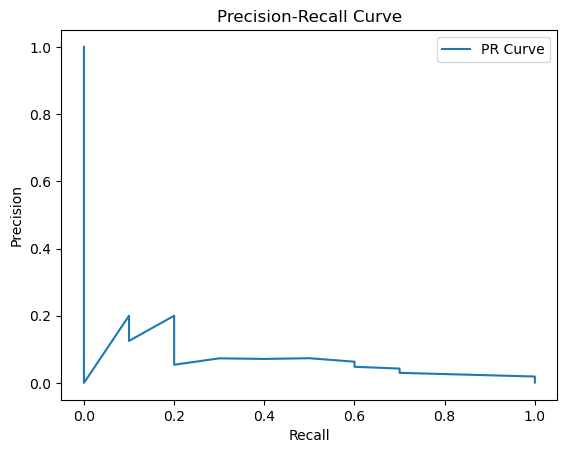

In [8]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(recall, precision, label='PR Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [9]:
!pip install imbalanced-learn xgboost scikit-learn matplotlib

# UNDER-SAMPLING with RandomUnderSampler

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Same preprocessing steps
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Under-sampling pipeline with RandomForest
from sklearn.ensemble import RandomForestClassifier
rus_pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit model
rus_pipeline.fit(X_train, y_train)

# Predict
y_pred = rus_pipeline.predict(X_test)
y_prob = rus_pipeline.predict_proba(X_test)[:, 1]

print("UNDER-SAMPLING (RandomUnderSampler):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


UNDER-SAMPLING (RandomUnderSampler):
Accuracy: 0.9651
Confusion Matrix:
 [[9642  348]
 [   1    9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      9990
           1       0.03      0.90      0.05        10

    accuracy                           0.97     10000
   macro avg       0.51      0.93      0.52     10000
weighted avg       1.00      0.97      0.98     10000

ROC AUC: 0.9559309309309308


## XGBoost Classifier (with SMOTE or RandomOverSampler if needed)

In [11]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

xgb_pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Optional: use RandomOverSampler() instead
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_prob_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

print("XGBOOST CLASSIFIER:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBOOST CLASSIFIER:
Accuracy: 0.9988
Confusion Matrix:
 [[9988    2]
 [  10    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000

ROC AUC: 0.9612712712712712


## 3. Custom Threshold Tuning

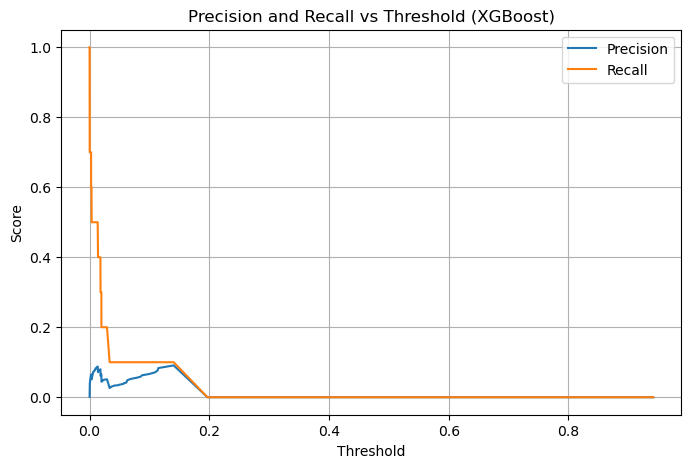

XGBOOST with custom threshold = 0.2
Confusion Matrix:
 [[9981    9]
 [  10    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9990
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



In [12]:
from sklearn.metrics import precision_recall_curve

# Use probability predictions
thresholds = []
precisions = []
recalls = []

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xgb)

# Plot precision-recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid()
plt.show()

# Choose a threshold manually (e.g., 0.2)
custom_threshold = 0.2
y_pred_custom = (y_prob_xgb >= custom_threshold).astype(int)

print(f"XGBOOST with custom threshold = {custom_threshold}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))


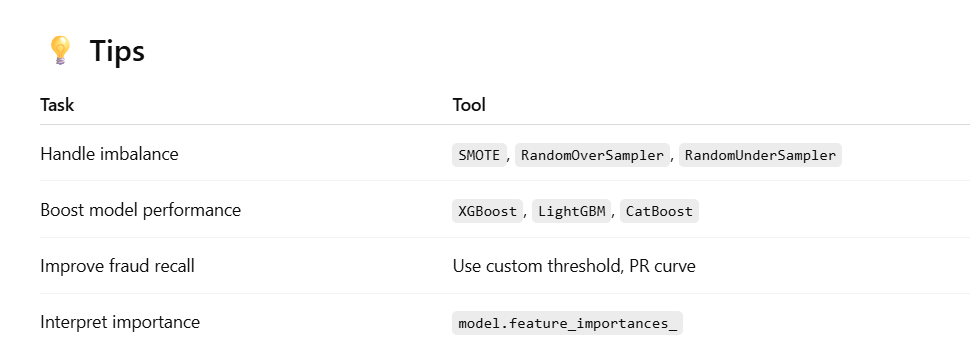

## SMOTE + XGBoost + Hyperparameter Tuning

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# ==== Preprocessing steps ====
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# ==== XGBoost + SMOTE Pipeline ====
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb)
])

# ==== Hyperparameter tuning ====
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
}

search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, 
    n_iter=10, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1, random_state=42
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit model
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Confusion Matrix:
 [[9792  198]
 [   3    7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9990
           1       0.03      0.70      0.07        10

    accuracy                           0.98     10000
   macro avg       0.52      0.84      0.53     10000
weighted avg       1.00      0.98      0.99     10000

ROC AUC: 0.985980980980981


In [14]:
import joblib

# Save model
joblib.dump(best_model, 'xgb_fraud_model.pkl')

# Load model
loaded_model = joblib.load('xgb_fraud_model.pkl')

# Predict with loaded model
y_pred_loaded = loaded_model.predict(X_test)


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# If it's a classification task:
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))


Accuracy: 0.9799
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      9990
           1       0.03      0.70      0.07        10

    accuracy                           0.98     10000
   macro avg       0.52      0.84      0.53     10000
weighted avg       1.00      0.98      0.99     10000

Confusion Matrix:
 [[9792  198]
 [   3    7]]


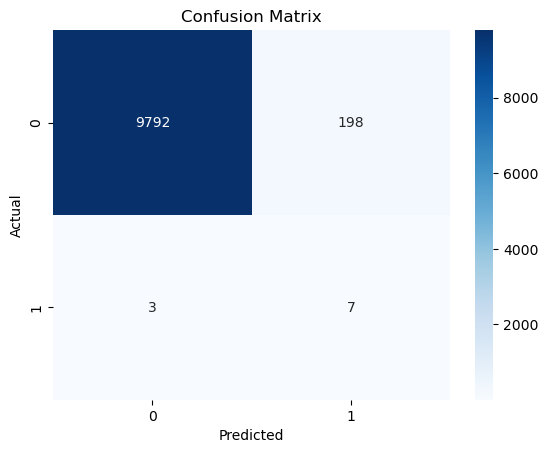

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_pred_loaded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Streamlit App (UI)

In [20]:
!pip install streamlit

In [21]:
import streamlit as st
import pandas as pd
import joblib

st.title("💳 Fraud Detection with XGBoost")

model = joblib.load("xgb_fraud_model.pkl")
model = joblib.load("xgb_fraud_model.pkl")

# Input fields
amount = st.number_input("Transaction Amount", value=100.0)
transaction_type = st.selectbox("Transaction Type", ['withdrawal', 'deposit', 'transfer'])
merchant_category = st.selectbox("Merchant Category", ['utilities', 'online', 'other'])
location = st.selectbox("Location", ['Tokyo', 'Toronto', 'London'])
device_used = st.selectbox("Device Used", ['mobile', 'pos', 'atm'])
payment_channel = st.selectbox("Payment Channel", ['card', 'ACH', 'wire_transfer'])

# Advanced features
time_since_last_transaction = st.slider("Time Since Last Transaction", -5.0, 5.0, 0.0)
spending_deviation_score = st.slider("Spending Deviation Score", 0, 20, 5)
velocity_score = st.slider("Velocity Score", 0.0, 1.0, 0.5)
geo_anomaly_score = st.slider("Geo Anomaly Score", 0.0, 1.0, 0.3)
hour = st.slider("Hour", 0, 23, 12)
month = st.slider("Month", 1, 12, 6)
year = st.slider("Year", 2023, 2025, 2023)
weekday = st.slider("Weekday", 0, 6, 2)

if st.button("Predict Fraud"):
    input_df = pd.DataFrame([{
        "transaction_type": transaction_type,
        "merchant_category": merchant_category,
        "location": location,
        "device_used": device_used,
        "payment_channel": payment_channel,
        "amount": amount,
        "time_since_last_transaction": time_since_last_transaction,
        "spending_deviation_score": spending_deviation_score,
        "velocity_score": velocity_score,
        "geo_anomaly_score": geo_anomaly_score,
        "hour": hour,
        "month": month,
        "year": year,
        "weekday": weekday
    }])
    
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]
    
    st.write(f"🧾 **Prediction:** {'FRAUD' if pred else 'NOT FRAUD'}")
    st.write(f"🔢 **Fraud Probability:** {prob:.2%}")


2025-06-23 16:13:56.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.566 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-23 16:13:56.604 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [54]:
streamlit run streamlit_app.py

SyntaxError: invalid syntax (1817081337.py, line 1)